In [5]:
%matplotlib inline
import pandas as pd
from sklearn import metrics, model_selection, ensemble
import matplotlib.pyplot as plt

df = pd.read_csv('suumo_treated_DB.csv', sep = '\t', index_col=0)
df = df.drop(df.index[df['total_annual_cost'] > 100000000])

,name,ward,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,...,rent,admin_fee,shikikin,reikin,hoshokin,shokyaku,monthly_rent,total_initial_cost,total_annual_cost,url
12799,六本木ヒルズレジデンス C棟,港,5,1,1,0,0,15,45,38,...,3250000,0,13000000,0,0,0,3250000,13000000,52000000,https://suumo.jp/chintai/jnc_000032559824/?bc=...
211438,麻布第一マンションズ,港,4,1,1,0,0,12,10,8,...,2600000,0,15600000,0,0,0,2600000,15600000,46800000,https://suumo.jp/chintai/jnc_000013352414/?bc=...
238699,麻布第一マンションズ,港,4,1,1,0,0,12,9,8,...,2600000,0,15600000,0,0,0,2600000,15600000,46800000,https://suumo.jp/chintai/jnc_000013352414/?bc=...
12881,麻布第一マンションズ,港,4,1,1,0,0,12,10,8,...,2600000,0,15600000,0,0,0,2600000,15600000,46800000,https://suumo.jp/chintai/jnc_000013352414/?bc=...
12882,東京メトロ日比谷線 六本木駅 地下1地上9階建 築12年,港,4,1,1,0,0,12,10,8,...,2600000,0,15600000,0,0,0,2600000,15600000,46800000,https://suumo.jp/chintai/jnc_000013352417/?bc=...
12798,六本木ヒルズレジデンス C棟,港,4,1,1,0,0,15,45,24,...,2690000,0,10760000,0,0,0,2690000,10760000,43040000,https://suumo.jp/chintai/jnc_000033469976/?bc=...
12802,都営大江戸線 六本木駅 地下2地上43階建 築15年,港,4,1,1,0,0,15,45,24,...,2690000,0,10760000,0,0,0,2690000,10760000,43040000,https://suumo.jp/chintai/jnc_000033632772/?bc=...
12773,元麻布ヒルズフォレストタワー,港,4,1,1,0,0,16,33,25,...,2600000,0,10400000,0,0,0,2600000,10400000,41600000,https://suumo.jp/chintai/jnc_000032559807/?bc=...
34353,東京メトロ千代田線 代々木公園駅 地下3地上4階建 築10年,渋谷,4,1,1,0,1,10,7,-1,...,2300000,0,9200000,0,0,0,2300000,9200000,36800000,https://suumo.jp/chintai/jnc_000030843089/?bc=...
102810,深沢ハウス,世田谷,3,1,1,0,0,14,20,19,...,2350000,0,7050000,0,0,0,2350000,7050000,35250000,https://suumo.jp/chintai/jnc_000033332937/?bc=...


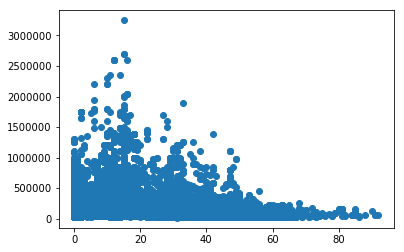

In [6]:
df = df.drop(df.index[df['age'] == 99])
plt.scatter(df['age'], df['monthly_rent'])

In [12]:
df = df.drop(df.index[df['floor'] < -2 ])

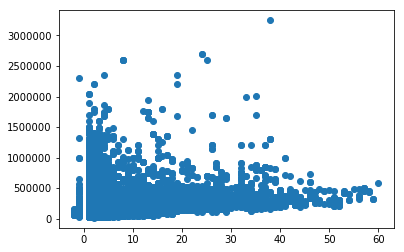

In [13]:
plt.scatter(df['floor'], df['monthly_rent'])
plt.show()

In [15]:
df = df.drop(df.index[df['floor_plan'] > 9 ])

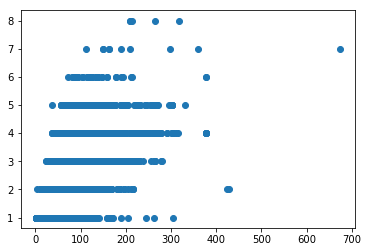

In [17]:
plt.scatter(df['surface'], df['floor_plan'])
plt.show()

In [18]:
df = df.drop(df.index[(df['floor_plan'] < 3) & (df['surface'] > 400 )])

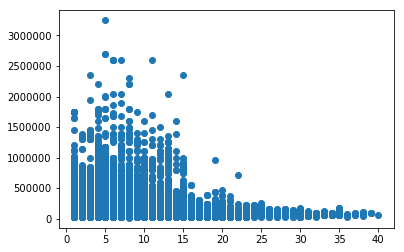

In [19]:
df = df.drop(df.index[(df['walk_min1'] > 40) ])
plt.scatter(df['walk_min1'], df['monthly_rent'])
plt.show()

In [20]:
ward = pd.get_dummies(df['ward'])

In [21]:
df_o = df[['floor_plan', 'plan_DK','plan_L','plan_K','plan_S','age','story', 'floor','surface','walk_min1', 'monthly_rent']]
df_o = pd.merge(df_o, ward, left_index=True, right_index=True)
df_o = df_o.dropna()
label = df_o['monthly_rent']
df_o.drop(['monthly_rent'], axis=1, inplace=True) 
data = df_o
data.head()

,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,surface,walk_min1,...,江戸川,江東,渋谷,港,目黒,練馬,荒川,葛飾,豊島,足立
12799,5,1,1,0,0,15,45,38,296.62,5.0,...,0,0,0,1,0,0,0,0,0,0
211438,4,1,1,0,0,12,10,8,301.53,6.0,...,0,0,0,1,0,0,0,0,0,0
238699,4,1,1,0,0,12,9,8,301.53,11.0,...,0,0,0,1,0,0,0,0,0,0
12881,4,1,1,0,0,12,10,8,301.53,6.0,...,0,0,0,1,0,0,0,0,0,0
12882,4,1,1,0,0,12,10,8,301.53,6.0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
#params = [{"n_estimators": [10, 100, 300]}]
#clf = GridSearchCV(ensemble.RandomForestRegressor(), params)
data_train, data_test, label_train, label_test = \
    model_selection.train_test_split(data, label, test_size=0.20)

#n_est = [10, 50, 100, 150, 250]
n_est = [100]
for est in n_est:
    
    clf = ensemble.RandomForestRegressor(n_estimators=est)
    clf.fit(data_train, label_train)
    print(clf.score(data_train, label_train))
    print(clf.score(data_test, label_test))

0.98922616917
0.953079238838


In [23]:
from sklearn.externals import joblib

joblib.dump(clf, 'suumo_rent_monthly_rent.pkl')

['suumo_rent_monthly_rent.pkl']

In [24]:

test_reindex = pd.merge(data_test, label_test.to_frame(), left_index=True, right_index=True)
test_reindex = test_reindex.sort_values(by='monthly_rent').reset_index()

del test_reindex['index']

test_reindex.head()

,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,surface,walk_min1,...,江東,渋谷,港,目黒,練馬,荒川,葛飾,豊島,足立,monthly_rent
0,1,0,0,0,0,48,2,1,11.57,17.0,...,0,0,0,0,0,0,0,0,1,20000
1,1,1,1,0,0,12,10,6,39.62,6.0,...,0,0,0,0,0,0,0,0,0,20000
2,1,0,0,0,0,51,2,2,9.72,6.0,...,0,0,0,0,0,0,0,0,0,20000
3,1,0,0,0,0,65,2,2,9.90,4.0,...,0,0,0,0,0,0,0,0,0,20000
4,1,0,0,0,0,48,2,2,14.00,4.0,...,0,0,0,0,0,0,0,0,0,20000


In [25]:
Y  = test_reindex['monthly_rent']
test_reindex.drop(['monthly_rent'], axis=1, inplace=True)
X = test_reindex

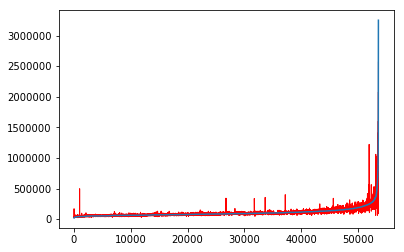

In [26]:
plt.plot(X.index, clf.predict(X), color='red', linewidth=1)
plt.plot(test_reindex.index, Y)
plt.show()

In [27]:
residual_RF = (Y-clf.predict(X))**2
residual_RF_total = residual_RF.sum()
#print(mean_absolute_error(Y, clf.predict(X)))
print(residual_RF_total)

1.44885680665e+13
